# Let's Get Warmed Up

we will start out with some simple sklearn models and a standard dataset. 

Whilst we are using this to get the brain pumping and looks at some patterns we'll see repeating throughout the tutorial, we also want to ask and explore some questions.

 - Why do we tune hyperparameters?
 - What's a hyperparameter?
 - Why do I need so much compute anyway? I can train my model in 3 mins, job done.
 - What do you mean my f1 validation score is a random variable?

### Dependencies

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')

In [3]:
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score

## Dataset

We are usig the Breast Cancer Dataset availale from sklearn.

Originally from the UCI Machine Learning Data Repository

![UCI](dataset.png)



The dataset is a binary classification problem.


In [4]:
features, labels = sklearn.datasets.load_breast_cancer(return_X_y=True)

30 features


[Text(0, 0, 'Benign'), Text(0, 0, 'Malignant')]

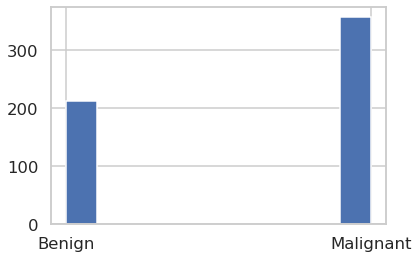

In [5]:
print(f"{features.shape[-1]} features")

_=plt.hist(labels)
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(['Benign','Malignant'])

## Define a training function

In [6]:
def train(features, labels):
    
    # randomly split the dataset, no seed, it's different each time
    train_x, test_x, train_y, test_y = train_test_split(features,
                                                        labels,
                                                        test_size=0.25)
    
    # setup a pipeline
    pipeline = make_pipeline(RobustScaler(),
                              RandomForestClassifier(
                                  n_estimators=15,
                                  criterion="entropy",
                                  max_features="auto",
                                  bootstrap=True,
                                  random_state=42   # freeze the seed of the estimator
                              ))

    pipeline.fit(train_x, train_y)
    y_pred = pipeline.predict(test_x)
    return f1_score(y_pred, test_y)

In [7]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.96517412935323376732555


 - But is this the best score?
 - the only score?
 - or the 'right' score?

In [8]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.96629213483146081387076


In [9]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.98342541436464081527902


In [10]:
score = train(features, labels)
print(f"F1 Score {score:.23f}")

F1 Score 0.97267759562841538123479


They are all different, why?

## Let's look many runs

...and plot the histogram

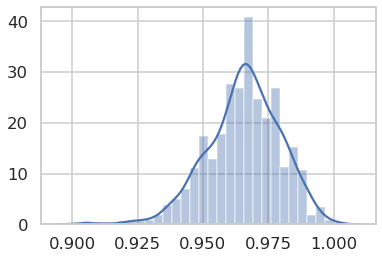

In [12]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
scores = []
for n in tqdm(range(1000)):
    scores.append(train(features, labels))
# _=plt.hist(scores, 100)
sns.distplot(scores)

So the actual distribution is a bit skewed but is centered around a central peak and if we squint, might fit a normal distribution, to a rough approximation in any case.

So let's model is with a normal distribution

Text(0.5, 1.0, 'Out of Bootstrap F1 Score Average: 0.966, Stddev 0.014 | Single Sample F1 Score 0.984')

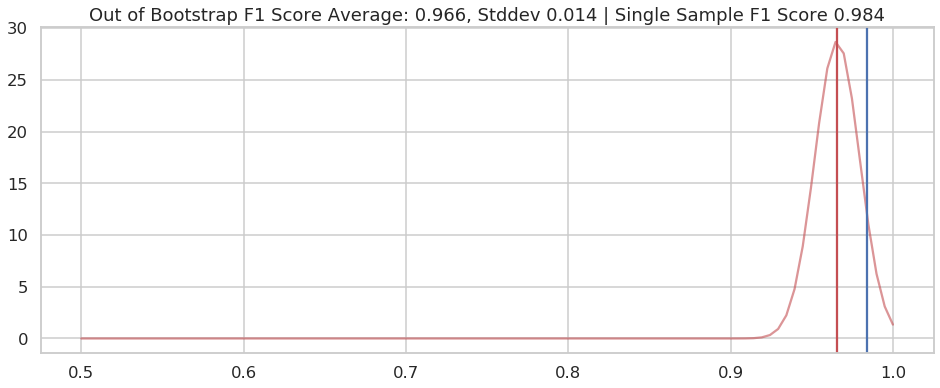

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16,6))

from scipy.stats import norm

# so let's fit a normal dist ot our scores
mu, sigma = norm.fit(scores)
x = np.linspace(0.5, 1.0, 100)

# plot that and mark it's eman for clarity
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', alpha=0.6)
ax.axvline(mu, color="r")


# and then let's generate another sample at random (trainnig again) and see where that lies
score = train(features, labels)
ax.axvline(score, color="b")
ax.set_title(f"Out of Bootstrap F1 Score Average: {mu:.3f}, Stddev {sigma:.3f} | Single Sample F1 Score {score:.3f}")

## Takeaways

 - working with single validation & test scores aren't enough
 - scores from individual samples are biased towards thoses splits
 - if you have large datasets with well aligned probability distributions between train / var / test then maybe you'll be ok
 - Often we don't especially in subsurface
 - this is why we need mutliple models runs, and why we need compute